PHASE 1 PROJECT

My company is interested in purchasing and operating airplanes for commercial and private enterprises.

The goal of this project is to help my company determine which aircraft are the lowest risk to purchase for the aforementioned goal.

This notebook will analyze the data and provide recommendations towards that goal.



Beginning: Starting by importing necessary libraries and importing the dataset and converting it into a pandas dataframe

In [140]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import data and convert to DataFrame
df = pd.read_csv('AviationData.csv', encoding='latin1')

c:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [109]:
# See how our dataframe looks like to start with
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Data Cleaning

In [111]:
# Data Cleaning
# Step 1
# Keep only relevant columns

df = df[['Event.Date', 'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
df.head()

,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1948-10-24,Fatal(2),Destroyed,Stinson,108-3,Personal,2.0,0.0,0.0,0.0
1,1962-07-19,Fatal(4),Destroyed,Piper,PA24-180,Personal,4.0,0.0,0.0,0.0
2,1974-08-30,Fatal(3),Destroyed,Cessna,172M,Personal,3.0,NaN,NaN,NaN
3,1977-06-19,Fatal(2),Destroyed,Rockwell,112,Personal,2.0,0.0,0.0,0.0
4,1979-08-02,Fatal(1),Destroyed,Cessna,501,Personal,1.0,2.0,NaN,0.0


In [ ]:
# Data Cleaning Step 2
# Get missing values in each column so we can figure out how to deal with missing data.
df.isnull().sum()

Event.Date                    0
Injury.Severity            1000
Aircraft.damage            3194
Make                         63
Model                        92
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
dtype: int64

In [113]:
# Step 3
# Drop rows with missing values in df['Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Purpose.of.flight']
df = df.dropna(subset=['Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Purpose.of.flight'])

In [114]:
# Confirm that rows with null values in previous cell were dropped
df.isnull().sum()

Event.Date                    0
Injury.Severity               0
Aircraft.damage               0
Make                          0
Model                         0
Purpose.of.flight             0
Total.Fatal.Injuries       9940
Total.Serious.Injuries    11058
Total.Minor.Injuries      10390
Total.Uninjured            5322
dtype: int64

In [115]:
# Step 4
# Fill rows with missing values in df['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'] with the median of each column
df.fillna(df.median(numeric_only=True), inplace=True)

In [116]:
# Confirm that we do not have null values now
df.isnull().sum()

Event.Date                0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [117]:
# Convert Event Date to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

In [118]:
# To only have modern aircraft technology let's only use data from 1990 onwards
df = df[df['Event.Date'].dt.year >= 1990]

In [119]:
# Keep only df['Personal', 'Business', 'Other Work Use' and 'Executive/corporate']  (In line with the goals of the business)
relevant_purposes = ['Personal', 'Business', 'Other Work Use', 'Executive/corporate']
df = df[df['Purpose.of.flight'].isin(relevant_purposes)]

In [120]:
# Create a Fatality Flag column
df['Fatality Flag'] = df['Total.Fatal.Injuries'].apply(lambda x: 1 if x > 0 else 0) 

In [121]:
# Confirm we have added the Fatality Flag Column
df.head(5)

,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Fatality Flag
24691,1990-01-01,Non-Fatal,Substantial,Cessna,150F,Personal,0.0,0.0,0.0,2.0,0
24695,1990-01-03,Non-Fatal,Substantial,Aeronca,11CC,Personal,0.0,0.0,0.0,1.0,0
24696,1990-01-03,Non-Fatal,Substantial,Steele,ACROSPORT II,Personal,0.0,0.0,0.0,2.0,0
24697,1990-01-03,Non-Fatal,Substantial,Mooney,MARK 22,Personal,0.0,0.0,0.0,5.0,0
24701,1990-01-04,Non-Fatal,Destroyed,Cessna,172E,Personal,0.0,0.0,2.0,0.0,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38592 entries, 24691 to 88886
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              38592 non-null  datetime64[ns]
 1   Injury.Severity         38592 non-null  object        
 2   Aircraft.damage         38592 non-null  object        
 3   Make                    38592 non-null  object        
 4   Model                   38592 non-null  object        
 5   Purpose.of.flight       38592 non-null  object        
 6   Total.Fatal.Injuries    38592 non-null  float64       
 7   Total.Serious.Injuries  38592 non-null  float64       
 8   Total.Minor.Injuries    38592 non-null  float64       
 9   Total.Uninjured         38592 non-null  float64       
 10  Fatality Flag           38592 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [123]:
# Format Make and Model
df['Make'] = df['Make'].str.upper().str.strip()
df['Model'] = df['Model'].str.upper().str.strip()

In [124]:
# See what we have after cleaning
df.head()

,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Fatality Flag
24691,1990-01-01,Non-Fatal,Substantial,CESSNA,150F,Personal,0.0,0.0,0.0,2.0,0
24695,1990-01-03,Non-Fatal,Substantial,AERONCA,11CC,Personal,0.0,0.0,0.0,1.0,0
24696,1990-01-03,Non-Fatal,Substantial,STEELE,ACROSPORT II,Personal,0.0,0.0,0.0,2.0,0
24697,1990-01-03,Non-Fatal,Substantial,MOONEY,MARK 22,Personal,0.0,0.0,0.0,5.0,0
24701,1990-01-04,Non-Fatal,Destroyed,CESSNA,172E,Personal,0.0,0.0,2.0,0.0,0


In [125]:
# Get a cleaner 'Make' column to only have makes with enough data

# Count accidents per make
make_counts = df['Make'].value_counts()

# Set threshold
threshold = 30  # Minimum number of accidents to be kept as a distinct make

# 4. Replace rare makes with 'OTHER'
common_makes = make_counts[make_counts >= threshold].index
df['Make'] = df['Make'].apply(lambda x: x if x in common_makes else 'OTHER')


Data Analysis

To get the safety profile of each aircraft, let's start by assessing the risk of each by creating a risk score

Risk Score = (Fatalities × 5) + (Serious Injuries × 2) + (Minor Injuries × 1)


In [126]:
# Establishing the safest aircraft
# Creating a risk score based on number and type of injuries sustained in accidents
df['Risk Score'] = (
    (df['Total.Fatal.Injuries'] * 5) +
    (df['Total.Serious.Injuries'] * 2) +
    (df['Total.Minor.Injuries'] * 1)
)

In [127]:
aircraft_risk = df.groupby(['Make'])['Risk Score'].sum().reset_index()

In [128]:
aircraft_risk = aircraft_risk.sort_values(by='Risk Score')

In [129]:
aircraft_risk

,Make,Risk Score
30,GREAT LAKES,22.0
58,ROTORWAY,45.0
13,BOEING STEARMAN,45.0
44,MOONEY AIRCRAFT CORP.,47.0
28,FLIGHT DESIGN GMBH,51.0
...,...,...
43,MOONEY,2509.0
9,BEECH,11280.0
49,PIPER,21087.0
47,OTHER,22949.0


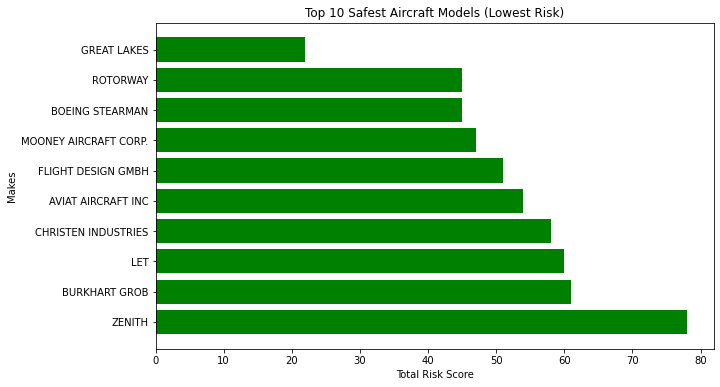

In [141]:
# Plotting the top 10 safest aircraft models
# (lowest risk score)
top_safe_aircraft = aircraft_risk.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_safe_aircraft['Make'], top_safe_aircraft['Risk Score'], color='green')
plt.xlabel('Total Risk Score')
plt.ylabel('Makes')
plt.title('Top 10 Safest Aircraft Models (Lowest Risk)')
plt.gca().invert_yaxis()
plt.show()


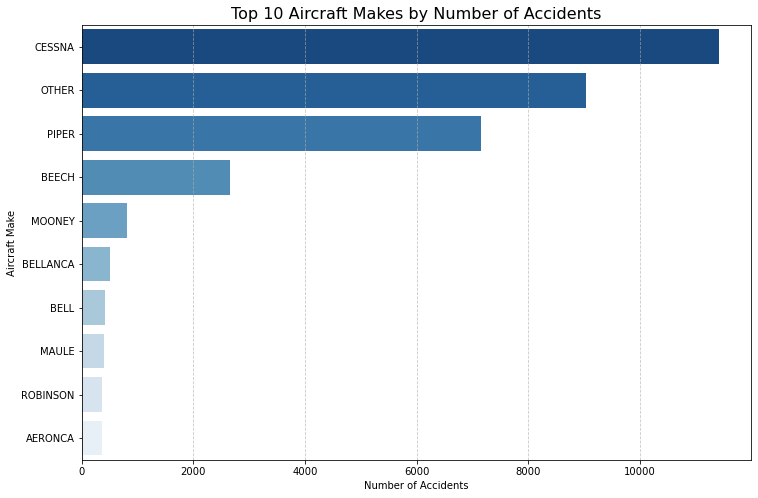

In [142]:
# Plotting the top 10 aircraft models with highest numnber of accidents

# Prepare data
accidents_by_make = df['Make'].value_counts().reset_index()
accidents_by_make.columns = ['Make', 'Accident_Count']

# Plot with Seaborn
plt.figure(figsize=(12,8))
sns.barplot(
    y='Make', x='Accident_Count', 
    data=accidents_by_make.head(10), 
    palette='Blues_r'
)
plt.title('Top 10 Aircraft Makes by Number of Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

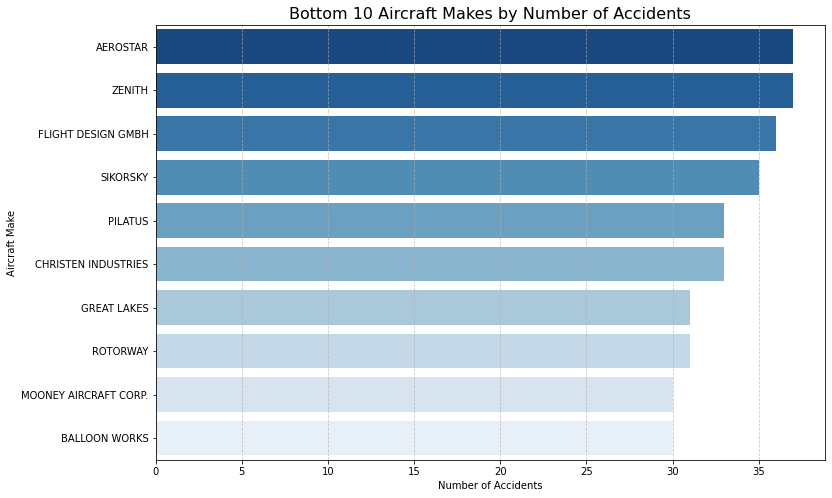

In [143]:
# Plotting the 10 aircraft models with lowest number of accidents
plt.figure(figsize=(12,8))
sns.barplot(
    y='Make', x='Accident_Count', 
    data=accidents_by_make.tail(10), 
    palette='Blues_r'
)
plt.title('Bottom 10 Aircraft Makes by Number of Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [136]:
safe_makes = top_safe_aircraft.sort_values(by= 'Risk Score')
safe_makes

,Make,Risk Score
30,GREAT LAKES,22.0
58,ROTORWAY,45.0
13,BOEING STEARMAN,45.0
44,MOONEY AIRCRAFT CORP.,47.0
28,FLIGHT DESIGN GMBH,51.0
7,AVIAT AIRCRAFT INC,54.0
17,CHRISTEN INDUSTRIES,58.0
39,LET,60.0
14,BURKHART GROB,61.0
71,ZENITH,78.0


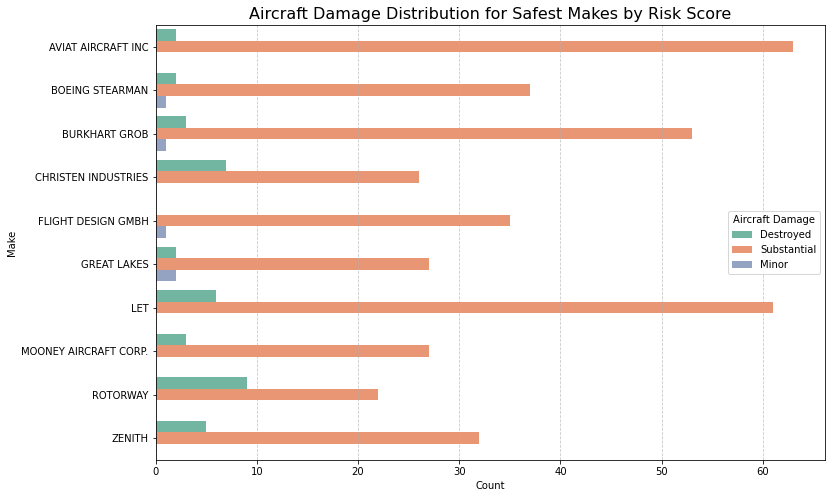

In [144]:
# Visualizing the aircraft damage for the safest makes
# Filter the dataframe for the safest makes
safest_makes = safe_makes['Make']
df_safest_makes = df[df['Make'].isin(safest_makes)]

# Count damage types for the safest makes
damage_counts = df_safest_makes.groupby(['Make', 'Aircraft.damage']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(
    data=damage_counts, 
    x='Count', y='Make', hue='Aircraft.damage', 
    palette='Set2'
)
plt.title('Aircraft Damage Distribution for Safest Makes by Risk Score', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Make')
plt.legend(title='Aircraft Damage')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()